<a href="https://colab.research.google.com/github/Viny2030/HUMAI/blob/main/Ejercicios_vectores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaIA/1_Vectores/ejercicios/Ejercicios_vectores.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

## Ejercicio 1: Ortogonalidad

Definir una función en python que detecte si dos vectores son ortogonales

In [2]:
import numpy as np
def son_ortogonales(u,v):
     return u.dot(v) == 0
  ###completá con tu código aquí

In [3]:
u

NameError: name 'u' is not defined

## Ejercicio 2: Desplazamiento

Definir una función en python que reciba como parámetro las cuatro esquinas de un cuadrilátero y las desplace 5 unidades hacia arriba y 7 unidades a la izquierda

In [6]:
def desplazar_punto(a):
  return a + np.array([-7,5])

def desplazar_puntos(a,b,c,d):
  return desplazar_punto(a),desplazar_punto(b),desplazar_punto(c),desplazar_punto(d)

Ejecutar la siguiente celda descomentando las lineas en verde para verificar su funcionamiento.

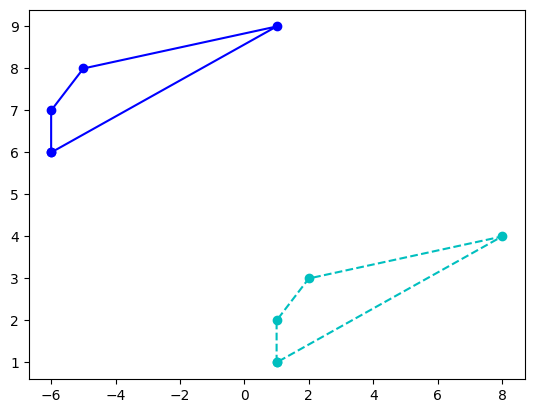

In [8]:
import matplotlib.pyplot as plt
a = np.array([1,1])
b = np.array([1,2])
c = np.array([2,3])
d = np.array([8,4])

x_coords, y_coords = zip(a,b,c,d,a)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

a_,b_,c_,d_ = desplazar_puntos(a,b,c,d)
x_coords_b, y_coords_b = zip(a_,b_,c_,d_,a_)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.show()

##              Ejercicio 3: Regresión lineal

El repositorio de datos del Observatorio Mundial de la Salud de la Organización Mundial de la Salud (OMS) realiza un seguimiento del estado de salud, así como de muchos otros factores relacionados, para todos los países. Usando los datos provistos por este ente, trataremos de encontrar si existe una correlación lineal entre algunos de estos factores.

Primero cargaremos los datos usando pandas.

In [9]:
!wget "https://storage.googleapis.com/humai-datasets/aws_s3/matematicas_para_ia/1_Vectores/ejercicios/Life%20Expectancy%20Data.csv"

--2025-03-02 21:46:45--  https://storage.googleapis.com/humai-datasets/aws_s3/matematicas_para_ia/1_Vectores/ejercicios/Life%20Expectancy%20Data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 142.250.152.207, 173.194.64.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333442 (326K) [text/csv]
Saving to: ‘Life Expectancy Data.csv’

Life Expectancy Dat 100%[===================>] 325.63K  --.-KB/s    in 0.004s  

2025-03-02 21:46:46 (86.4 MB/s) - ‘Life Expectancy Data.csv’ saved [333442/333442]



In [10]:
import pandas as pd
data = pd.read_csv("Life Expectancy Data.csv")
print(data.shape)
data.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

A continuación filtraremos la información teniendo en cuenta sólo el año 2014 y aquellos paises para los cuales hay datos acerca de:
* Producto Interno Bruto per cápita (en USD)
* Gasto en salud como porcentaje del Producto Interno Bruto per cápita (%)

In [11]:
data2=data.query("Year == 2014")
data2=data2.query("GDP < 80000")
data2=data2.query("`percentage expenditure` != 0")
data2 = data2.loc[:,["Country","percentage expenditure","GDP"]]
print(data2.shape)
data2.head()

(151, 3)


,Country,percentage expenditure,GDP
1,Afghanistan,73.523582,612.696514
17,Albania,428.749067,4575.763787
33,Algeria,54.237318,547.851700
49,Angola,23.965612,479.312240
65,Antigua and Barbuda,2422.999774,12888.296670


A continuación graficaremos el gasto en salud en función del pbi para corroborar que hay una dependencia lineal.

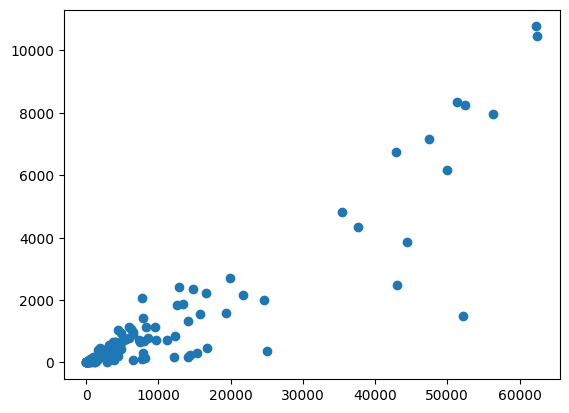

In [13]:
import matplotlib.pyplot as plt
gasto = data2.loc[:,"percentage expenditure"]
pbi = data2.loc[:,"GDP"]
plt.scatter(pbi,gasto)
plt.show()

En el gráfico, se puede ver que los puntos se alinean siguiendo algo parecido a una recta. Así que, usaremos regresión lineal para calcular la recta que más se aproxime a los datos. Siga las instrucciones para lograrlo.


#### Paso 1
Transformar las variables "pbi" y "gasto" en los array de numpy "x" e "y" respectivamente.

In [14]:
#completá con tu código aquí
x = np.array(pbi)
y = np.array(gasto)


#### Paso 2
Calcular las valores óptimos de las variables $\beta_1$ y $ \beta_0$ siguiendo las fórmulas vistas en clase.

$$\beta_1 = \frac{(\boldsymbol{x}-\boldsymbol{\bar{x}})\cdot(\boldsymbol{y}-\boldsymbol{\bar{y}})}{(\boldsymbol{x}-\boldsymbol{\bar{x}})\cdot(\boldsymbol{x}-\boldsymbol{\bar{x}})}$$

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

Nota: recordá que el uso del broadcasting de numpy puede ayudarte.

In [15]:
#completá con tu código aquí
b1_num = (x - x.mean()).dot(y - y.mean())
b1_den = (x - x.mean()).dot(x - x.mean())
b1 = b1_num/b1_den
b0 = y.mean() - b1*x.mean()


##  Paso 3
Calcular las predicciones del gasto usando los coeficientes obtenidos en la regresión con la fórmula $ \boldsymbol{\hat{y}} = \boldsymbol{\beta_0} + \beta_1 \boldsymbol{x}$.

Nota: recordá que el uso del broadcasting de numpy puede ayudarte.

In [17]:
#completá con tu código aquí
y_hat = b0 + b1*x

#### Paso 4
Grafica los puntos $(x,y)$ y la recta obtenida en el mismo plot para verificar su desempeño.

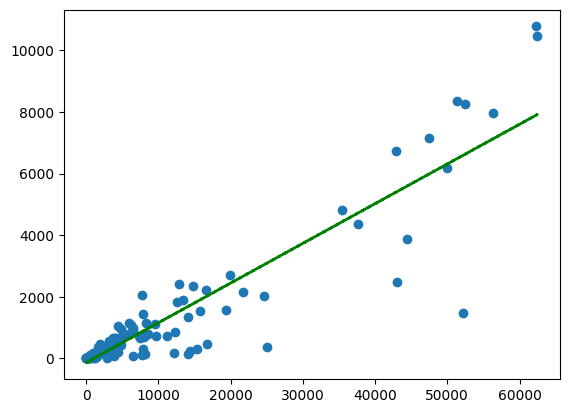

In [18]:
#completá con tu código aquí
f, ax = plt.subplots(1)
ax.scatter(x, y)
ax.plot(x, y_hat, 'g--', linewidth=2)
plt.show(f)

##  Ejercicio 4: Embeddings de personalidad

El dataset MyPersonality generó mucha [controversia](https://www.businessinsider.com/facebook-investigates-mypersonality-app-in-new-data-scare-2018-5), ya que incluye información sensible de millones de personas y no siempre fue recolectada con consentimiento. Consiste en información del perfil y de actualizaciones de la red social Facebook, apareada con puntajes de rasgos de personalidad calculadas vía un cuestionario en la app.

La prueba Big5 (Costa y Mac Crae 1985, Goldberg et al. 2006) es una taxonomía o clasificación de rasgos de personalidad que analiza la composición de cinco dimensiones de personalidad en su sentido más amplio. Esta disertación se publicó en el Psychological Review, 41, 1-32. Los cinco factores son:

- Apertura a la experiencia (openness to experience): inventivo/curioso vs. consistente/cauteloso
- Escrupulosidad (conscientiousness): eficiente/organizado vs. extravagante/descuidado
- Extraversión: sociable/enérgico vs. solitario/reservado  
- Amabilidad (agreeableness): amigable/compasivo vs. desafiante/insensible
- Neuroticismo: susceptible/nervioso vs. resistente/seguro

La siguiente celda carga el dataset y lo desordena.

In [19]:
import pandas as pd

import plotly.express as px
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np

In [20]:
df = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/matematicas_para_ia/1_Vectores/ejercicios/mypersonality.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b8295738a9b021d82860887c3be41164,feria del queso en Turrialba...arooo,4.00,3.25,3.50,4.25,5.00,y,y,n,y,y,07/04/09 12:58 AM,899.0,396675.0,98.49,0.01,400536.0,0.50,0.03
1,c5d9ffcb242053b0abdebe0d684fea3a,going to see Crazy Heart ad go out to dinner i...,2.50,2.45,3.17,3.75,3.25,n,n,n,y,n,01/17/10 08:41 PM,159.0,10399.2,83.84,0.08,11611.0,0.47,0.43
2,c19a4fb5e846fb6575b0a8f3a2081ea0,savner Norge...,3.25,3.75,1.75,4.00,3.50,n,y,n,y,n,12/23/09 03:31 AM,671.0,216520.0,96.61,0.02,220974.0,0.49,0.17
3,8bfbf6d9c91e07247d0ff83bbcacee68,I love the fray!! .:squeeky voice:.,4.50,2.25,3.75,2.25,4.00,y,n,y,n,y,09/17/09 03:15 AM,676.0,222411.0,97.77,0.01,225707.0,0.50,0.06
4,7f3bfec0b7228d0900b01fbc8ce9d59f,Naps Suck. Someone shoulda woke me dammit!,2.25,3.50,3.25,2.75,2.25,n,y,n,n,n,10/05/09 01:47 AM,1098.0,593081.0,98.66,0.01,598066.0,0.50,0.04


Las columnas sOPN, sCON, sEXT, sAGR y sNEU contienen los valores de las 5 componentes de la personalidad de cada usuario. Almacenemos los datos de personalidad de los 5 primeros ejemplos del dataset en 5 vectores numpy.

In [21]:
v0 = np.array(df.loc[0,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v1 = np.array(df.loc[1,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v2 = np.array(df.loc[2,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v3 = np.array(df.loc[3,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])
v4 = np.array(df.loc[4,['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']])

A continuación, vamos a trabajar un poco sobre estos vectores.

#### Paso 1
Encontrá un vector que describa a la personalidad promedio dentro de las 5 muestras que extrajimos del dataset.

In [22]:
#completá con tu código aquí
promedio = v0 +v1 +v2 +v3 +v4
promedio = promedio/5
print(promedio)


[3.6 3.4 3.3 3.084 3.04]


####Paso 2
Programá una función que devuelva el ángulo entre dos vectores pasados como parámetro

In [24]:
import numpy.linalg as LA
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

#### Paso 3
Podemos establecer qué tan parecidas son las personalidades en función del ángulo entre los vectores. Mientras menor sea el ángulo más parecida será la dirección de los vectores y también la personalidad de las personas a las que representan.
Establecé cuales dos personas son más parecidas dentro de la muestra de 5 personas que extrajimos del dataset.

In [25]:
import math
vectores = [v0,v1,v2,v3,v4]
min_angle = 180
similar_vectors = []
for v1 in vectores:
    for v2 in vectores:
        if not (v1 == v2).all():
            angle = vector_angle(v1, v2)
            if angle < min_angle:
                min_angle = angle
                similar_vectors.clear()
                similar_vectors.append(v1)
                similar_vectors.append(v2)
print("Los vectores más parecidos son:",
      similar_vectors[0],
      "y",
      similar_vectors[1],
      "con un ángulo de",
      round(math.degrees(min_angle),2),
       "grados")



Los vectores más parecidos son: [5.0 4.25 4.0 3.5 3.25] y [3.25 3.75 2.5 3.17 2.45] con un ángulo de 8.86 grados


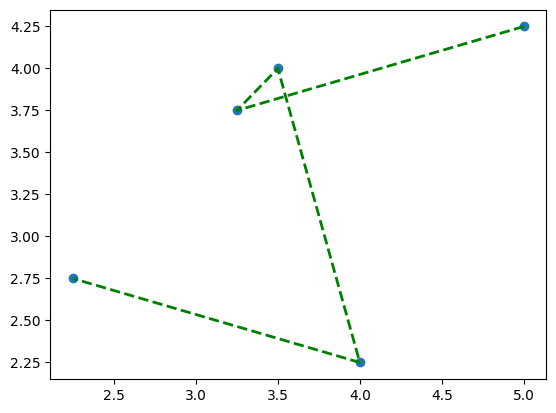

In [30]:
import numpy as np

# Assuming 'vectores' is a list of 5 numpy arrays, each with 5 elements:
x_coords = [v[0] for v in vectores]  # Extract the first element of each vector for x-coords
y_coords = [v[1] for v in vectores]  # Extract the second element of each vector for y-coords

f, ax = plt.subplots(1)
ax.scatter(x_coords, y_coords)  # Now you're providing x and y
# ax.plot(v1, y_hat, 'g--', linewidth=2)  # This line was causing the error - removed
# The line below plots a line connecting the points in the scatter plot.
# However, remember that these points represent personalities in 5 dimensions
# plotted on 2 dimensions, so the line may not be meaningful in this context.
ax.plot(x_coords, y_coords, 'g--', linewidth=2)
plt.show(f)